In [6]:
# Import the required libraries [cite: 5]
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset [cite: 12]
df = sns.load_dataset('titanic')

# Display the first 5 rows to make sure it's loaded correctly
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
# Fill missing 'age' values with the median
df['age'].fillna(df['age'].median(), inplace=True)

# Fill missing 'embarked' values with the mode (the most common value)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# The 'deck' column has too many missing values, so we'll drop it
df.drop('deck', axis=1, inplace=True)

# Verify that we've handled all missing values
print("Missing values after cleaning:")
df.isnull().sum()

Missing values after cleaning:


C:\Users\gowra\AppData\Local\Temp\ipykernel_13152\3299978945.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\gowra\AppData\Local\Temp\ipykernel_13152\3299978945.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [8]:
# Convert 'sex' and 'embarked' columns into numerical dummy variables
# drop_first=True helps avoid issues in some models
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

# Display the first 5 rows to see the new columns
df.head()

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,True,False,True
1,1,1,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,False,False,False
2,1,3,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,False,False,True
3,1,1,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,False,False,True
4,0,3,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,True,False,True


In [9]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Select the columns to scale
columns_to_scale = ['age', 'fare']

# Fit and transform the data, updating the columns in the dataframe
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the first 5 rows to see the scaled data
df.head()

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,sex_male,embarked_Q,embarked_S
0,0,3,-0.565736,1,0,-0.502445,Third,man,True,Southampton,no,False,True,False,True
1,1,1,0.663861,1,0,0.786845,First,woman,False,Cherbourg,yes,False,False,False,False
2,1,3,-0.258337,0,0,-0.488854,Third,woman,False,Southampton,yes,True,False,False,True
3,1,1,0.433312,1,0,0.420730,First,woman,False,Southampton,yes,False,False,False,True
4,0,3,0.433312,0,0,-0.486337,Third,man,True,Southampton,no,True,True,False,True


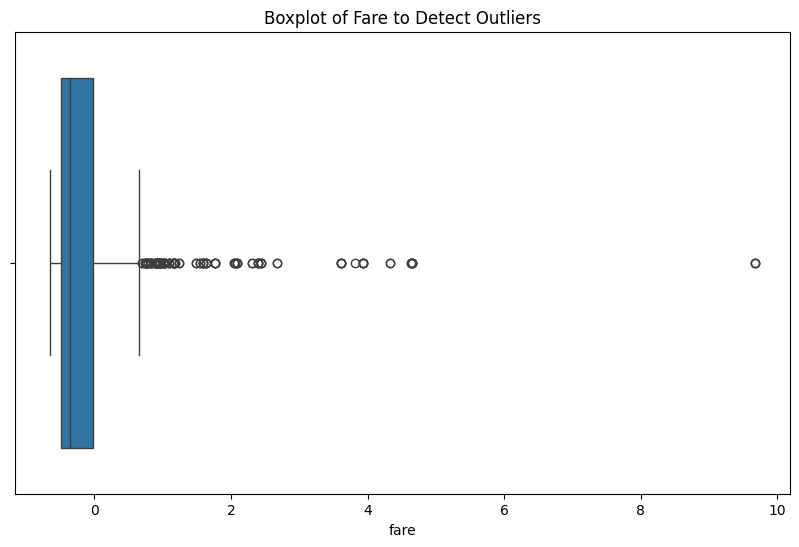

Original number of rows: 891
Number of rows after removing outliers: 775
Number of outliers removed: 116


In [10]:
# 1. Visualize outliers in the 'fare' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['fare'])
plt.title('Boxplot of Fare to Detect Outliers')
plt.show()

# 2. Remove outliers using the Interquartile Range (IQR) method
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Get the original number of rows
original_rows = len(df)

# Filter the dataframe to keep only the rows without outliers
df = df[(df['fare'] >= lower_bound) & (df['fare'] <= upper_bound)]

# Get the new number of rows
new_rows = len(df)

print(f"Original number of rows: {original_rows}")
print(f"Number of rows after removing outliers: {new_rows}")
print(f"Number of outliers removed: {original_rows - new_rows}")